# Machine Learning Approach to Alpha Market Groupings

<li> Unsupervised clustering groups together different items based on similarities without knowing what their 'true' category is. </li>
<li> Usupervised learning can help show similarities within observations in the data that may not be immediately obvious through elementary analysis or visualizations. </li>
<li> The two unsupervised clustering approaches used here are <b>Hierarchial Agglomerative Clustering</b> and <b>K-Means Clustering</b> </li>
<ul> 
  <li> Agglomerative clustering is a 'bottom-up' approach, and starts with each observation as its own cluser and then works to group the individual clusters into larger clusters. </li> 
  <li> K-Means clustering is a partitional clustering approach, meaning it partitions the data and alogirthmically modifies the clusters to minimize the variation within the clusters. This is a great approach for large data sets, and computationally more efficient than many forms of hierarchial clustering. </li>
</ul>

### Algorithms Explained:

#### Hierarchial Clustering:

<li><b>Step 1:</b> All observations are their own, individual, clusters.</li>
<li><b>Step 2:</b> Some distance metric (e.g. Euclidean distance) is determined.</li>
<li><b>Step 3:</b> The two observations closest together are grouped together in a new cluster.</li>
<li><b>Step 4:</b> The processs is repeated for the N observations, until all observations are added into the cluster.</li>
<li><b>Step 5:</b> A dendrogram is a visualization that plots merging of the individual observations into the single cluster. It shows the path from leaves to the single cluster, and shows the various branch points throughout.</li>
<li><b>Step 6:</b> A cutoff point can be determined on the dendrogram, which will decide the final number of clusers. </li>

#### K-Means Clustering:

<li><b>Step 1:</b> All observations are their own, individual, clusters.</li>
<li><b>Step 2:</b> Some distance metric (e.g. Euclidean distance) is determined.</li>
<li><b>Step 3:</b> The final number of clusters desired is prespecified. </li>
<li><b>Step 4:</b> If we want k clusters, k observations are chosen, at random, to be the centroids of each of the k clusters.</li>
<li><b>Step 5:</b> The centers of each of the k clusters are the redetermined.</li>
<li><b>Step 6:</b> Each observation is reassigned to the cluster whose centroid they are closest to.</li>
<li><b>Step 7:</b> This process is repeated until the algorithm converges, or at which point all of the observations appear to be in the closest possible centroid.</li>

In [1]:
"""
Created on Fri Dec 20 11:09:33 2019

@author: alexandra.rotondo
"""
import pyodbc
import pandas as pd
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import random
import math

random.seed(555) 

#### Functions

In [15]:
#######
#functions
#######

def get_data_frame(dataset):
    MARKETS = unique(dataset)
    INIT = []
    ROC_75 = []
    ROC_25 = []
    #VAC = []

    problems = []

    for mkt in MARKETS:
        if(not math.isnan(f(75, str(mkt), data))):
            INIT.append(f(75, str(mkt), data))
            ROC_75.append(fp(75, str(mkt), 50, data))
            ROC_25.append(fp(25, str(mkt), 25, data))
            #VAC.append(vacation(str(mkt)))
        else:
            problems.append(str(mkt))
            
    MARKETS = clean(MARKETS, list(set(problems)))

    CLASS = np.repeat(0, len(MARKETS))
    df = pd.DataFrame(CLASS)
    df['ALPHAMKT'] = MARKETS
    df['INIT'] = INIT
    df['ROC_75_TO_25'] = ROC_75
    df['ROC_25_TO_DPT'] = ROC_25
    #df['VACATION_INDICATOR'] = VAC
    df = df[['ALPHAMKT', 'INIT', 'ROC_75_TO_25', 'ROC_25_TO_DPT']]
    return(df)

def clean(data, subset):
    output = []
    for mkt in data:
        if mkt not in subset:
            output.append(str(mkt))
    return(output)

def get_min_AP(mkt):
    subset = data[data.ALPHAMKT == str(mkt)]
    return(-1*max(subset['DTD']))

def get_max_AP(mkt):
    subset = data[data.ALPHAMKT == str(mkt)]
    return(-1*min(subset['DTD']))

#vacation_hubs = ['MCO', 'LAS', .. etc] #this could also be generated in a csv file and read in separately

def vacation(market):
    if 'MCO' in str(market):
        return(1)
    elif 'LAS' in str(market):
        return(1)
    else:
        return(0)

def unique(data): #get unique elements from object data
    unique_markets = []
    for mkt in data['ALPHAMKT']:
        if str(mkt) in unique_markets:
            pass
        else:
            unique_markets.append(str(mkt))
    return(unique_markets)

def f(h, alpha, data):   #returns the LDF_BKD for a specific market at h days prior to departure date
    subset = data[data.ALPHAMKT == str(alpha)]
    rez = subset[subset.DTD == -1*h]
    return(np.median(rez.LDF_BKD))

def fp(h, alpha, delta, data): #first derivative
    p1 = f(h, alpha, data)
    p2 = f(h - delta, alpha, data)
    return((p2-p1)/delta)

def fpp(h, alpha, delta, data): #second derivate
    p3 = fp(h, alpha, delta, data)
    p4 = fp(h - delta, alpha, delta, data)
    return((p4-p3)/delta)

#### SQL Pull:

In [3]:
# -*- coding: utf-8 -*-
print('Starting @ : {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())) 

SQL_FILE = 'fullquery2.txt'
TRAINING_MARKETS = 'bcurvesquery.txt'

print("Executing Snapshot query...")

conn = pyodbc.connect(
    r'DRIVER={SQL Server Native Client 11.0};'
    r'SERVER=FDCSQLCE04P;'
    r'DATABASE=RM_REPORTS;'
    r'Trusted_Connection=yes;'
    )

with open(SQL_FILE, 'r') as myfile:
    sql = myfile.read().replace('\n',' ')

data = pd.read_sql(sql,conn)
data['DTD'] = -1*data['DTD']

with open(TRAINING_MARKETS, 'r') as myfile:
    sql = myfile.read().replace('\n',' ')

train_data = pd.read_sql(sql, conn)
train_data['DTD'] = -1*train_data['DTD']

#ATL_LGA = data[data.ALPHAMKT == 'ATLLGA'] #3 >> business
#DEN_LAX = data[data.ALPHAMKT == 'DENLAX'] #2 >> mid
#DEN_LAS = data[data.ALPHAMKT == 'DENLAS'] #2 >> mid
#DEN_PHX = data[data.ALPHAMKT == 'DENPHX'] #2 >> mid
#DEN_IND = data[data.ALPHAMKT == 'DENIND'] #1 >> vacation
#DTW_MCO = data[data.ALPHAMKT == 'DTWMCO'] #1 >> vacation
#DEN_CUN = data[data.ALPHAMKT == 'DENCUN'] #1

print("Finished Query")

Starting @ : 2020-01-15 12:48:53
Executing Snapshot query...
Finished Query


## Exploring Model Market Behavior:

Text(0.5, 1.0, 'All Markets')

<Figure size 432x288 with 0 Axes>

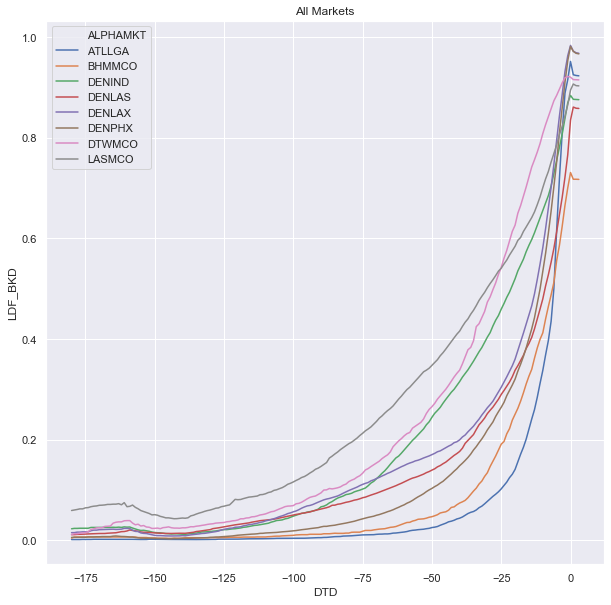

In [4]:
########
sb.set(style="darkgrid")
########

plt.clf()
plt.figure(figsize=(10, 10))  
sb.lineplot(x='DTD', y='LDF_BKD', hue='ALPHAMKT', data=train_data).set_title("All Markets")

### Comments:

<ul>
    <li>Certain markets have, on average, different booking patterns than others.</li>
    <li>Notable points along the booking curves that differ across markets are the load factor at 75 days out, the rate of change in bookings from 75 to 25 DTD, and the rate of change in bookings from 25 days to the departure date.</li>
    <li>If we take the median of a market's behavior for all AP options, can we separate the booking curves into distinct clusters based on the parameters mentioned above?</li>
    <ul>
        <li>If so, this can help to draw generalizations upon markets that behave similarly.</li>
        <li>This can also help for more effective pricing, marketing/promotion, and fare shifting across different markets that behave similarly.</li>
    </ul>
</ul>

## Condensing Data:

<li>Since the full data pulls for a full year, each market will have multiple LDF values for a given AP value.</li>
<li>This takes the median all available LDF values for a market for a given AP (DTD) value.</li>

In [5]:
mkts = pd.Series(list(set(data.ALPHAMKT))).sort_values(ascending=True)

li = [] 
for mkt in mkts:
    temp = data[data.ALPHAMKT == str(mkt)].groupby('DTD').median()
    df = pd.DataFrame(np.repeat(str(mkt), len(temp.index.values)), temp['LDF_BKD'])
    df['DTD'] = temp.index.values
    li.append(df)

final = pd.concat(li).reset_index()
final.columns = ['LDF_BKD', 'ALPHAMKT', 'DTD']
final = final[['ALPHAMKT', 'DTD', 'LDF_BKD']]
#final.head()

## All Booking Curves:

<li>All markets, with their median LDF for each DTD value, are plotted below.</li>

Text(0.5, 1.0, 'All Markets')

<Figure size 432x288 with 0 Axes>

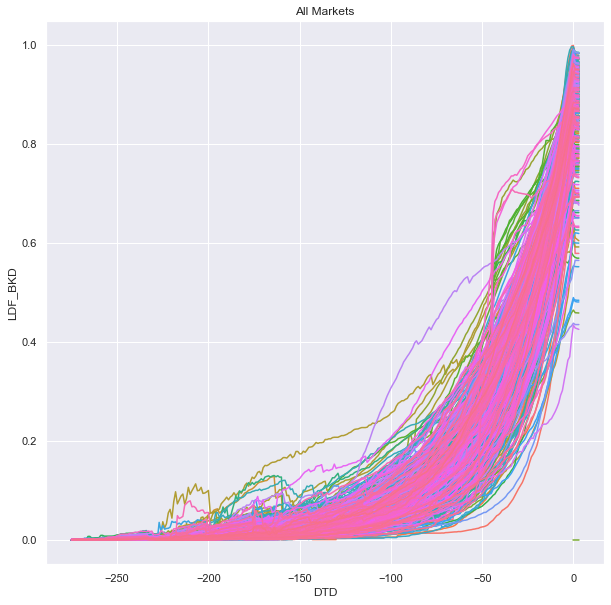

In [6]:
########
sb.set(style="darkgrid")
########

plt.clf()
plt.figure(figsize=(10, 10))  
sb.lineplot(x='DTD', y='LDF_BKD', hue='ALPHAMKT', data=final, legend=False).set_title("All Markets")

* We can see that there exists different behaviors in markets once AP <= 75
* <b>Goal</b>: can we identify the behavior of a market based on the rate of change from AP = 75 to AP = 25, and the LDF at 75 days out?

## Exploring Market Variance:

<li>The following section plots specific booking curves as a time series.</li>
<li>The hue padding the actual curve reflects the variance in the booking factor for that market at each day.</li>
<li>Ideally, you want to see little variance (equivalently, very little padding)</li>
<li>The core goal of this section is to identify markets with large degrees of variance that could potentially belong in multiple categories, if that is an issue.</li>
<li><b>Orlando and Vegas markets are explored specifically, but 'MCO' can be changed to 'ABCDEF' to see the variance in a specific alpha market.</b></li>

### MCO Variance: 

In [7]:
MCO_MARKETS = set()

for mkt in data['ALPHAMKT']:
    if 'MCO' in str(mkt):
        MCO_MARKETS.add(str(mkt))
        
MCO_MARKETS = list(MCO_MARKETS)

frames = []
for mkt in MCO_MARKETS:
    df = data[data.ALPHAMKT == str(mkt)]
    frames.append(df)

MCO_DATA = pd.concat(frames)

<Figure size 432x288 with 0 Axes>

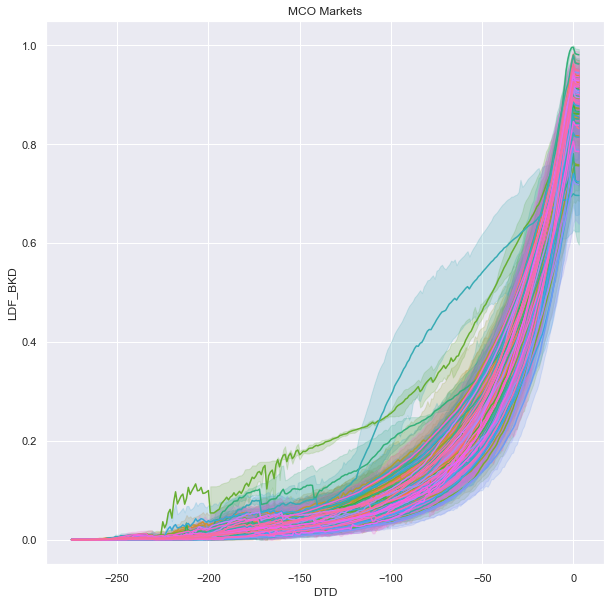

In [8]:
plt.clf()
plt.figure(figsize=(10, 10))  
fig = sb.lineplot(x='DTD', y='LDF_BKD', hue='ALPHAMKT', data=MCO_DATA, legend=False)
fig = fig.set_title("MCO Markets")

### Comments:

<li>Mostly, markets have little variance!</li>
<li>Some markets do have larger variance, but those markets will only ever be in one specific category.</li>

### LAS Effect

In [61]:
LAS_MARKETS = set()

for mkt in data['ALPHAMKT']:
    if 'LAS' in str(mkt):
        LAS_MARKETS.add(str(mkt))
        
LAS_MARKETS = list(LAS_MARKETS)

frames = []
for mkt in LAS_MARKETS:
    df = data[data.ALPHAMKT == str(mkt)]
    frames.append(df)

LAS_DATA = pd.concat(frames)

<Figure size 432x288 with 0 Axes>

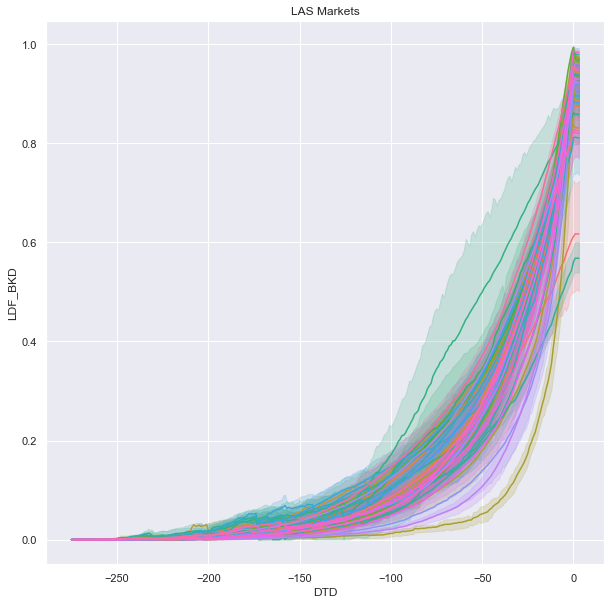

In [62]:
plt.clf()
plt.figure(figsize=(10, 10))  
fig = sb.lineplot(x='DTD', y='LDF_BKD', hue='ALPHAMKT', data=LAS_DATA, legend=False)
fig = fig.set_title("LAS Markets")

In [ ]:
#weird market is CUNLAS

#### First Derivative Comparison for a Destination MCO Market vs Business Market

In [9]:
print ((.6-.1)/50) #rate of change for DTWMCO

0.01


* rate of change for DTWMCO from AP = 75 to AP = 25 is .01

In [10]:
print ((.1-0)/50)

0.002


* rate of change for ATLLGA, primarily a business market, is .002, from AP = 75 to AP = 25
* this is noticably lower than DTWMCO, which is has a much higher portion booked further out, since MCO is a common vacation destination.

### Derivative Function Validation: Ignore, Unless Running Notebook

#### Instructions if Running Notebook:

<li><b>Step 1:</b> Make sure that all blocks of code have been run prior to running the bits below.</li>
<li><b>Step 2:</b> Run the bits below. If they don't throw errors, then everything is done, and you can move onto the other blocks of code.</li>
<li><b>Step 3:</b> If they do throw errors, re-run the second chunk of code (the <b>FUNCTIONS</b> block), and then re-run the bits below. Everything should be fine now!</li>

In [9]:
p1= f(100, 'DTWMCO', data)
p1

0.13432963910201762

In [13]:
print(fpp(100, 'DTWMCO', 20, data))

0.00011808207434644129


* they work!

## Classification Options:

<li> Below, we explore a rudimentary form of classification, case-when, and then explore higher-level approaches (hierarchial agglomerative and K-Means).</li>

In [16]:
#Populates the data frame containing the parameters for each of the alpha markets
import warnings
warnings.filterwarnings("ignore")

df_full = get_data_frame(final)
df_full.head()

,ALPHAMKT,INIT,ROC_75_TO_25,ROC_25_TO_DPT
0,ABQAUS,0.053395,0.005973,0.013265
1,ABQDEN,0.060269,0.004846,0.025916
2,ABQMCO,0.105967,0.006471,0.014204
3,ABQSAT,0.057778,0.005705,0.011960
4,ALBDEN,0.130983,0.007700,0.014402


### Case-When Classification

* Most basic (and most easly interpreted algorithmically) form of classification.
* Classifies a market based on its LDF 25 days prior to departure
* This can get more involved, and have other conditions implemented
* A major con of this type of classification is the subjectiveness of it. Much of the decision boundaries are determined by 'eye-balling' which groups appear to be the most similar. This is often sufficient, but a more algorithmic approach can sometimes reveal higher-level similarties that are not apparent initially.
* Often biased, because it relies on eye-balling, or other imprecise determination.

In [18]:
PRED_CLASS = np.repeat(0, len(df_full))
i = 0
for mkt in df_full['ALPHAMKT']:
    if (f(25, str(mkt), data) <= .3):
        PRED_CLASS[i] = 3
    elif (f(25, str(mkt), data)  > .3 and f(25, str(mkt), data) <= .45):
        PRED_CLASS[i] = 2
    else:
        PRED_CLASS[i] = 1
    i += 1

df_full['CASE_WHEN_PRED'] = PRED_CLASS

In [19]:
temp = pd.Series(PRED_CLASS)
temp.value_counts() #everything should sum to len(df_full) or 431 as of 1/14/2020

1    237
2    170
3     24
dtype: int64

### Visualizing Booking Curves via Behavior Category determined by Case-When Classification

<Figure size 432x288 with 0 Axes>

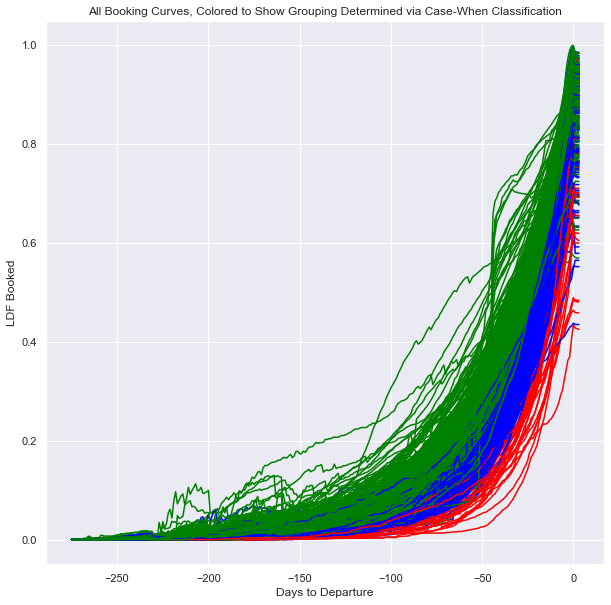

In [20]:
plt.clf()
plt.figure(figsize=(10, 10))  
for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        #pred = df_temp.loc[:, 'CASE_WHEN_PRED']
        #pred = set(pred)
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['CASE_WHEN_PRED'].array[0]
        if 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 3 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')         
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via Case-When Classification")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

### Comments:

<ul>
    <li>Overall, this achieves the goal: it partitions the markets into three (3) categories based primarily on the rate of change from 75 days out to 25 days out.</li>
    <li>This method is inherently subjective, but easily understood and modifiable.</li>
    <li>With the chosen cut-off points, this creates somewhat biased classes. The majority of the markets follow a vacation-booking pattern, in that the majority of the bookings happen farther out from departure and the rate of bookings tapers off as the departure date approaches.</li>
    <li>In the sections below, more algorithmic approaches to classifying the market behavior are implemented and explored.</li>
</ul>

## Hierarchial Agglomerative Clustering (with Dendrograms)

<ul>   
    <li> Type of unsupervised clustering, meaning that we want to categorize a set of items, but we don't necesarrily know which items go together, or why they go together.</li>
    <li>Groups items together that behave similarly with respect to a specified metric</li>
    <li>This metric is often Euclidean distance, but could be correlation ($R^{2}$, etc.), or any other metric that measures similarity.</li>
    <li>The two predictors used in this instance were the LDF Booked at 75 days prior to departure, and the rate of change of the graph from 75 DTD to 25 DTD.</li>
    <li>The model can use up to n predictors (e.g. as many as you want), but to keep everthing as clear and interpretable as possible, fewer predictors are generally preferred.</li> 
    <li>Helps to provide a less subjective approach than case-when clustering, as this uses an algorithm as opposed to 'eye-balling', etc. </li>
</ul>

In [21]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram

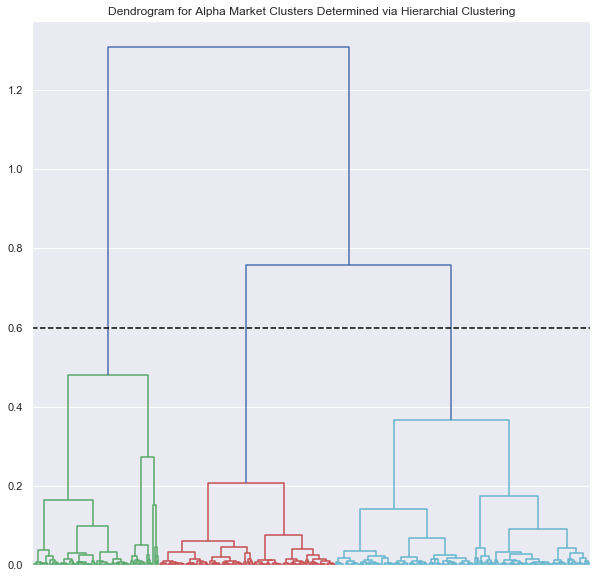

In [22]:
plt.figure(figsize=(10, 10))  
plt.title("Dendrogram for Alpha Market Clusters Determined via Hierarchial Clustering")
plt.axhline(y=.6, color="black", ls="--")
dend = shc.dendrogram(shc.linkage(df_full.iloc[:,1:4], method='ward'), color_threshold=.6, no_labels=True) 

### Interpreting the Dendrogram:

<ul>
    <li>The dendrogram shows the merging map of each individual market into larget clusters.</li>
    <li>The bottom leaves of the graph correspond to individual Alpha Markets.</li>
    <li>The vertical lines show the connection between a smaller cluster and a parent cluster, and therefore indicate similarity between the groups. <b>How much similarity will vary depending on the data.</b></li>
    <li>Horizontal distance between two child clusters <b>do not</b> indicate any similarities between the two child clusters.</li>
    <ul>
        <li>Though they ended up as part of the same parent cluster, since all of the observations are eventually merged into one cluster, there is no way to quanitfy how different the two child clusters were prior to their merging.</li>
    </ul> 
    <li>Therefore, horizontal distance is disregarded as a measure of any sort of similarity between groups.</li>
<br>
    <li>How many clusters that are used to represent the data is a subjective choice that is determined by selecting a cut-off point on the y-axis.</li> 
        <ul>
            <li>This horizontal line is drawn, and the number of splits above and down to the line is the number of clusters.</li></ul>
<br>
    <li>In this instance, since the goal is to identify three groups of market behavior, the cut off point used is .6. Above the line y=.6, there are 3 splits, corresponding to three overall clusters.</li>
</ul>    

### Visualizing the Booking Curves with their Corresponding Behavior Category

In [23]:
colors = pd.Series(dend['color_list']).apply(str)
index = pd.Series(dend['ivl']).apply(int)
labels = np.repeat(0, len(df_full))

j=0
for j in range(0, len(df_full)):
    try:
        if (colors[j] == 'g'):
            labels[index[j]] = 0
        elif (colors[j] == 'r'):
            labels[index[j]] =1
        elif (colors[j] == 'c'):
            labels[index[j]] =2
        else:
            labels[index[j]] =3
    except KeyError:
        labels[index[j]] = -1
        
df_full['H_CL_PRED'] = labels
#df_full.head()

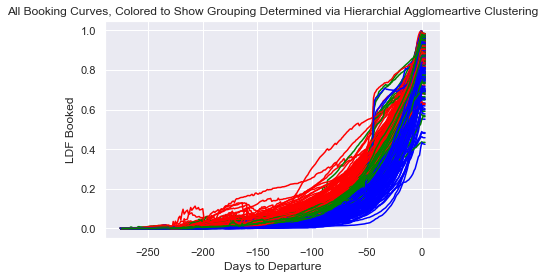

In [25]:
plt.clf()
#plt.figure(figsize=(7, 7))  

for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        #pred = df_temp.loc[:, 'H_CL_PRED']
        #pred = set(pred)
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['H_CL_PRED'].array[0]
        if 0 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via Hierarchial Agglomeartive Clustering")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

### Comments:

<ul>
    <li>The colorized graph shows the presence of three mostly non-overlapping groups!</li>
    <li>This is good, because if we got a graph where the groups were not distinct, that would indicate that the method used wasn't the most effective.</li>
    <li>Additionally, the groups correspond to the booking patterns we know to exist throughout different markets!</li>
    <li>This method should be compared to another unsupervised method in order to verify that it's working correctly, and that the results remain relatively consistent across other available methods with similar goals.</li>
</ul>

## K-Means Clustering of Alpha Markets

<ul>
    <li>K-Means is a partitional, unsupervised clustering algorithm.</li>
    <li>This means that K-Means identifies clusters by partitioning the data, which is a different approach than hierarchial clustering which starts off with each observation as an individual cluster and then groups them together as a single cluster.</li>
    <li>K-Means can work well with larger data than hierarchial clustering, and is generally more computationally efficient regardless of data size.</li>
    <li>K-means <b>requires</b> a prespecified number of desired clusters to work. This is great if you want to control the number of clusters or groups, but bad if you're uncertain as to how many there truly are.</li>
    <ul>
        <li>Hierarchial clustering allows you to choose how many clusters you want by selecting the cut-off height</li>
    </ul>
    <li>The K-Means algorithm will run until all of the observations appear to be in the cluster whose centroid they are closest to.</li>
    <ul>
        <li>A potential con is when this converges to local minimum as opposed to a global minimum, which results in a situation where the clusters do not have the lowest possible inner-centroid variance.</li>
    </ul> 
    <li>Another con is that the initial partitions are randomly chosen, which can impact the resulting clusters. Often, K-Means is run many times to ensure that the clusters determined are the optimal clusters.</li>
</ul>    

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
K_MEANS_PRED = kmeans.fit_predict(df_full.iloc[:,1:4])
df_full['K_MEANS_PRED'] = K_MEANS_PRED

<Figure size 432x288 with 0 Axes>

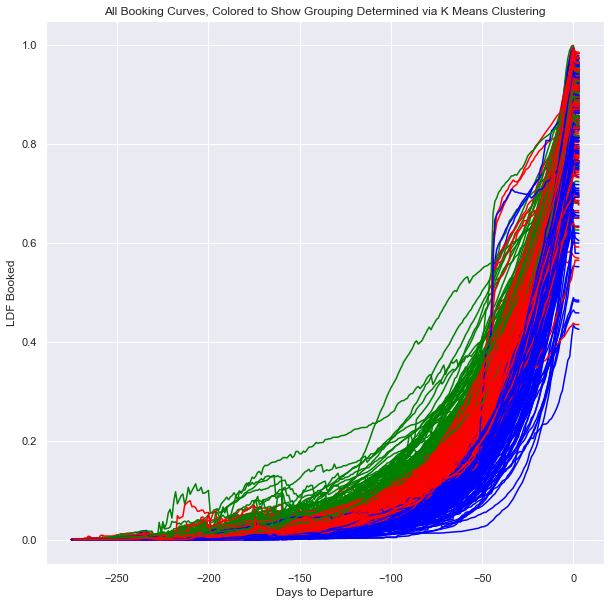

In [27]:
plt.clf()
plt.figure(figsize=(10, 10))  
for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        #pred = df_temp.loc[:, 'K_MEANS_PRED']
        #pred = set(pred)
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['K_MEANS_PRED'].array[0]
        if 0 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')         
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via K Means Clustering")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

### Comments:

<ul>
    <li>This colorized graph shows a structure and category spread similar to that determined by hierarchial clustering.</li>
    <li>This is good, since it indicates that our methods are working similarly, and producing similar results.</li>
</ul>

### Elbow Plot:

<ul>
    <li>K-Means requires a prespecified number of clusters to work. However, how do we know that is the optimal number of clusters? Maybe the markets would be better represented if there were 4, 5, 6,...,etc., groups? </li>
    <li>The elbow plot shows a statistic that measures cluster dissimilarity plotted against the number of clusters.</li>
    <li>The goal is to minimize the WCSS statistic without overfitting the data. Meaning, we want WCSS small, but we want to do so with the smallest number of clusters possible.</li>
    <li>The optimal number of clusters is inner part of the elbow, or the part where the graph begins to curve to the right and the WCSS statistic begins to taper down.</li>
</ul>

<Figure size 432x288 with 0 Axes>

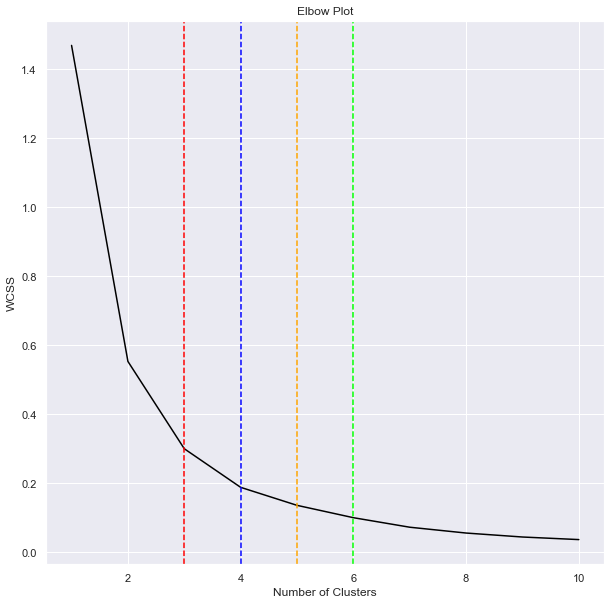

In [31]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_full.iloc[:,1:4])
    wcss.append(kmeans.inertia_)

plt.clf()
plt.figure(figsize=(10, 10))  
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.plot(range(1,11), wcss, color="black")

colors = ['red', 'blue', 'orange', 'lime']
i = 0
for c in colors:
    plt.axvline(x=3+i, color = c, ls='--')
    i+=1
    
plt.show()

### Comments:

<ul>
    <li>Three clusters is right in the crux of the elbow.</li>
    <li>4 clusters shows a lower WCSS statistic, and doesn't dramatically increase the complexity of the groupings. Therefore, that may be a better representation of the markets.</li>
    <li> Similarly, 5-6 may be explored as an option, too! Beyond that, the increased complexity does not reduce variation enough to warrant the includion of > 6 clusters </li>
</ul>

### Markets with 4 Clusters:

<Figure size 432x288 with 0 Axes>

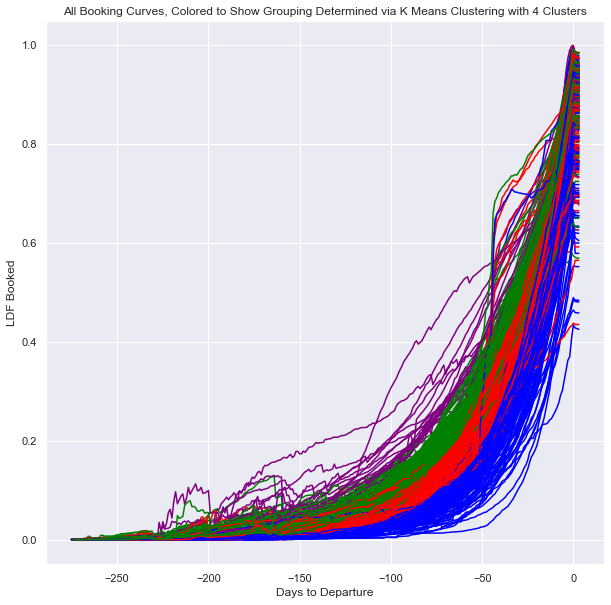

In [34]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
K_MEANS_PRED_4 = kmeans.fit_predict(df_full.iloc[:,1:4])
df_full['K_MEANS_PRED_4'] = K_MEANS_PRED_4

plt.clf()
plt.figure(figsize=(10, 10))  
for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['K_MEANS_PRED_4'].array[0]
        if 0 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='purple')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 3 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')  
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via K Means Clustering with 4 Clusters")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

In [33]:
pd.Series(K_MEANS_PRED_4).value_counts()

0    157
2    146
3    106
1     22
dtype: int64

### Comments:

<ul>
    <li>Top group (purple) caputes outling markets well, while effectively segmenting the remaining markets.</li>
</ul>

### K-Means with > 4 Clusters

<ul>
    <li>K-Means is explored below with and 6 clusters.</li>
    <li>Adds a fair amount of complexity, but does capture outlying markets fairly well.</li>
    <li>Also helps to effectively segment the larger groups that are captured in hierarchial clustering and k-means with 3 and 4 clusters.</li>
</ul>

### K-Means with 5 Clusters:

<Figure size 432x288 with 0 Axes>

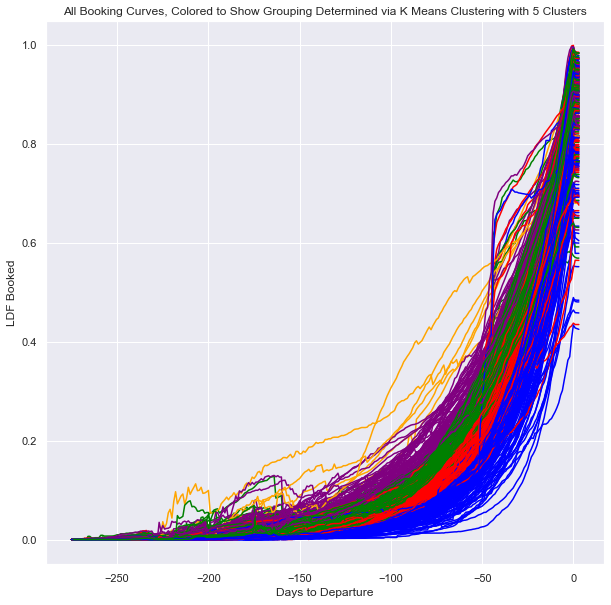

In [37]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
K_MEANS_PRED_5 = kmeans.fit_predict(df_full.iloc[:,1:4])
df_full['K_MEANS_PRED_5'] = K_MEANS_PRED_5

plt.clf()
plt.figure(figsize=(10, 10))  
for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['K_MEANS_PRED_5'].array[0]
        if 0 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='purple')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='orange')
        elif 3 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 4 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 5 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='cyan')
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via K Means Clustering with 5 Clusters")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

In [54]:
pd.Series(K_MEANS_PRED_5).value_counts()

0    148
1    140
2     87
3     49
4      7
dtype: int64

### Comments

<ul>
    <li>Having 5 clusters helps to capture the outlying markets well, while partitioning the remaining markets into distinct groups.</li>
    <li>This adds complexity, but is also potentially helpful.</li>
</ul>

### K-Means with 6 Clusters:

<Figure size 432x288 with 0 Axes>

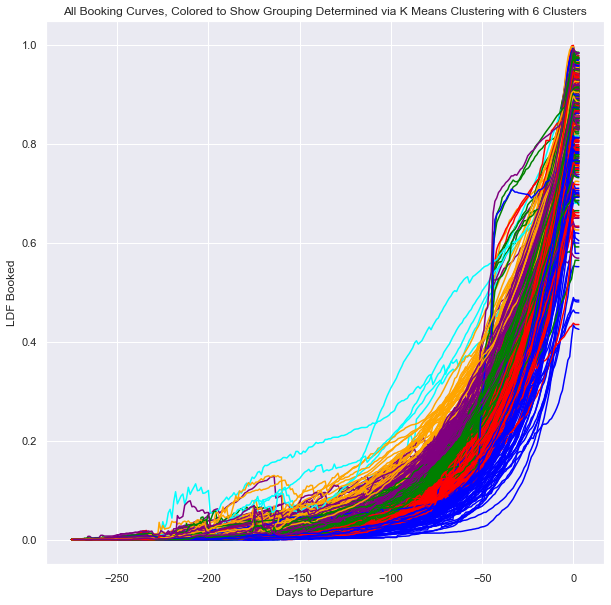

In [40]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
K_MEANS_PRED_6 = kmeans.fit_predict(df_full.iloc[:,1:4])
df_full['K_MEANS_PRED_6'] = K_MEANS_PRED_6

plt.clf()
plt.figure(figsize=(10, 10))  
for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        pred = df_full[df_full.ALPHAMKT == str(mkt)]
        pred = pred['K_MEANS_PRED_6'].array[0]
        if 0 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='purple')
        elif 1 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 2 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 3 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='orange')
        elif 4 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='cyan')
        elif 5 == pred:
            plt.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
    except KeyError:
        pass

plt.title("All Booking Curves, Colored to Show Grouping Determined via K Means Clustering with 6 Clusters")
plt.xlabel("Days to Departure")
plt.ylabel("LDF Booked")
plt.show()

In [41]:
pd.Series(K_MEANS_PRED_6).value_counts()

2    113
5    110
1     88
0     85
3     30
4      5
dtype: int64

### Comments:

<ul>
    <li>As with the addition of a fourth and fifth cluster, the outlying markets are captured well.</li>
    <li>This partitions the remainng markets into five other groups.</li>
    <li>Six clusters adds a fair amount of complexity, and could possibly be better represented with fewer clusters.</li>
</ul>

### Comparing Results:

<li>Below is a visual comparing the plots of the alpha market booking curves, colored to correspond to their behavior category.</li>
<li>This compares the results obtained from hierarchial clustering, K-Means with three clusters, and K-Means with four clusters.</li>

<Figure size 432x288 with 0 Axes>

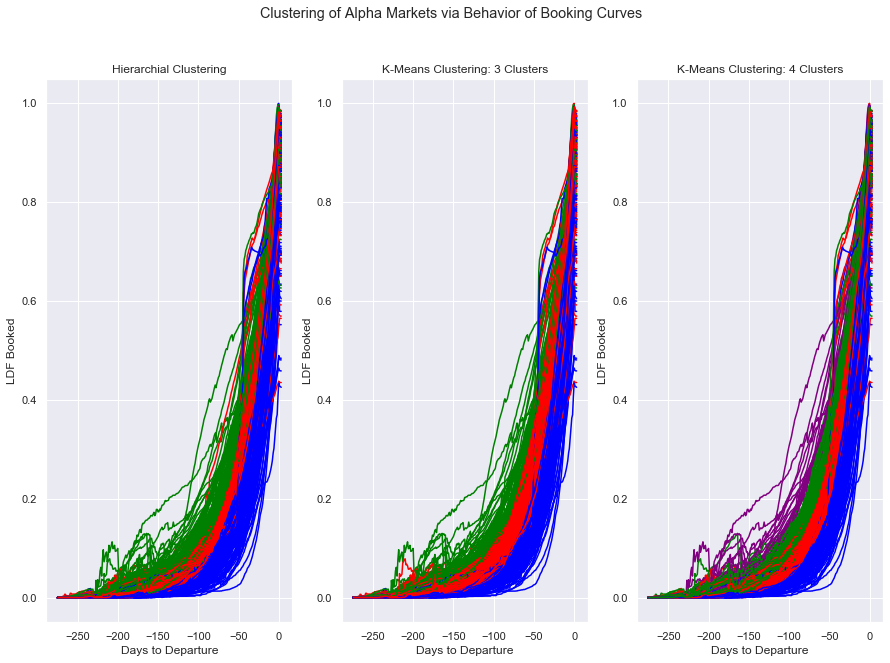

In [45]:
plt.clf()

f, (plot1, plot2, plot3) = plt.subplots(1, 3, figsize=(15,10))

OUTLIERS = []

for mkt in df_full.ALPHAMKT:
    #print('working on market: ' + str(mkt))
    try:
        df_temp = final[final.ALPHAMKT == str(mkt)]
        
        pred_k_4 = df_full[df_full.ALPHAMKT == str(mkt)]
        pred_k_4 = pred_k_4['K_MEANS_PRED_4'].array[0]
    
        pred_k = df_full[df_full.ALPHAMKT == str(mkt)]
        pred_k = pred_k['K_MEANS_PRED'].array[0]
        
        pred_hcl = df_full[df_full.ALPHAMKT == str(mkt)]
        pred_hcl = pred_hcl['H_CL_PRED'].array[0]
        
        if 0 == pred_hcl:
            plot1.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 1 == pred_hcl:
            plot1.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 2 == pred_hcl:
            plot1.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')    
        
        if 0 == pred_k:
            plot2.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 1 == pred_k:
            plot2.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        elif 2 == pred_k:
            plot2.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red') 
            
        if 0 == pred_k_4:
            plot3.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='red')
        elif 1 == pred_k_4:
            OUTLIERS.append(str(mkt))
            plot3.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='purple')
        elif 2 == pred_k_4:
            plot3.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='blue')
        elif 3 == pred_k_4:
            plot3.plot(df_temp['DTD'], df_temp['LDF_BKD'], color='green')
        
    except KeyError:
        pass

f.suptitle("Clustering of Alpha Markets via Behavior of Booking Curves")
plot1.set_title("Hierarchial Clustering")
plot2.set_title("K-Means Clustering: 3 Clusters")
plot3.set_title("K-Means Clustering: 4 Clusters")

plot1.set(xlabel="Days to Departure", ylabel="LDF Booked")
plot2.set(xlabel="Days to Departure", ylabel="LDF Booked")
plot3.set(xlabel="Days to Departure", ylabel="LDF Booked")

plt.show()

### Comments:

<li>None of the groupings are relatively consistent, and the addition of a fourth grouping does not dramatically alter the other groupings.</li>
<li>Adding a fourth grouping does differentiate between the markets in the larger green category.</li>
<li>There are pretty noticable differences in the rate of changes, and thus the market behavior, within the green cateogry.Some curves have a much higher ROC from 75 DTD to 25 DTD than other markets in this same category.</li>
<li>Since the addition of a fourth grouping does not make the model significantly more complex, nor does it cause it to lose interpretability, this may be a better representation way to represent the markets.</li>
<li>The addition of a 5th and 6th cluster adds complexity, but does segment the middle portion while also grouping the outlying markets together.</li>

## Final Results:

<li>This will show which markets fall into which category!</li>
<li>The results will be shown for the labels obtained through K-Means with 3 and 4 clusters.</li>
<li>Since the results from hierachial clustering and K-Means with 3 clusters are quite similar, for brevity they will be omitted.</li>
<li>tempX['ALPHAMKT'] is commented out, but can be uncommented to be able to see all of the markets.</li>

## K-Means with 3 Clusters: 

<b>Group 1: More Bookings Farther Out</b>
<ul>
    <li>This is the <b>RED</b> group in the second graph above.</li>
    <li>This correspond to markets that have a large portion of their bookings farther out from the day of departure.</li>
    <li>This would include vacation markets, such as <b>CUNLAS</b></li>
</ul>
<br>
<b>Group 2: Steady Bookings</b>
<ul>
    <li>This is the <b>BLUE</b> group in the second graph above.</li>
    <li>This corresponds to markets that some bookings farther out, and book relatively steadily throughout the time leading up to departure.</li>
    <li>This would include markets such as <b>DENPHX</b></li>
</ul>
<br>
<b>Group 3: More Bookings Closer In</b>
<ul>
    <li>This is the <b>GREEN</b> group in the second graph above.</li>
    <li>This correspond to markets that have a large portion of their bookings closer towards the day of departure.</li>
    <li>This would include business markets, such as <b>ATLLGA</b></li>
</ul>

## K-Means with 4 Clusters:

In [46]:
print(OUTLIERS)

['BTVDEN', 'BTVMCO', 'BUFRSW', 'CLERSW', 'CLESEA', 'CUNLAS', 'CUNMCI', 'DENGRB', 'DENPVR', 'DENPWM', 'DFWMCO', 'DSMMCO', 'DTWRSW', 'ISPRSW', 'LASMKE', 'LASRSW', 'MCOPUJ', 'MCOPWM', 'MKEPHX', 'MSNPHX', 'OMARSW', 'PVDRSW']


<b>Group 1: Outlying Markets</b>
<ul>
    <li>This is the <b>PURPLE</b> group in the second graph above.</li>
    <li>This corresponds to markets that are more outlying in beahvior, relative to other markets.</li>
    <li>These markets have a much larger proprotion of bookings farther out than any other markets.</li>
    <li>This includes vacation markets such as <b>BVTMCO</b> and the outer outlying, non-vacation markets shown above.</li>
    <li>BTV is interesting because it is a popular skiing destination, so that could explain the behavior.</li>
</ul>
<br>
<b>Group 2: More Bookings Farther Out</b>
<ul>
    <li>This is the <b>RED</b> group in the second graph above.</li>
    <li>This correspond to markets that have a large portion of their bookings farther out from the day of departure.</li>
    <li>This would include vacation markets, such as <b>LASMCO</b></li>
    <li>These markets are more consistent in booking patterns as compared to other markets, and behave differently than other vacation markets encompassed in group 1.</li>
</ul>
<br>
<b>Group 3: Steady Bookings</b>
<ul>
    <li>This is the <b>BLUE</b> group in the second graph above.</li>
    <li>This correspond to markets that have bookings farther out, but overall book steadily up through the time of departure.</li>
    <li>This would include markets, such as <b>DENPHX</b></li>
</ul>
<br>
<b>Group 4: More Bookings Closer In</b>
<ul>
    <li>This is the <b>GREEN</b> group in the second graph above.</li>
    <li>This correspond to markets that have a large portion of their bookings closer to the day of departure.</li>
    <li>This would include business-oriented markets, such as <b>ATLLGA</b></li>
</ul>

## Excel Output

<ul>
    <li><b>MAKE SURE THE GROUPS ARE REORDERED BEFORE GENERATING OUTPUT FILES.</b></li>
    <ul>
        <li>K-Means will result in the same alpha markets being groupted together (save for very small amounts of variation).</li>
        <li>However, K-means will randomly label those clusters.</li>
        <li>Running the K-Means model multiple times will result in the same groupings, but those groupings will have different names.</li>
        <li>In addition to manually recoloring the graphs so that they match, THE COLUMNS ON THE OUTPUT FILES NEED TO BE REORDERED TO MAKE SURE THEY MATCH THE GRAPHS.</li>
        <li><b>Groups should be listed in a top-down pattern</b>, with the topmost group as group 1, ...,etc.</li>
    </ul>
    <li>See 'READ ME BEFORE RUNNING NOTEBOOKS.TXT' in directory</li>
</ul>

In [47]:
temp1 = df_full[df_full.K_MEANS_PRED ==0]
g3_1 = pd.Series(list(temp1['ALPHAMKT'])).sort_values(ascending=True)

temp2 = df_full[df_full.K_MEANS_PRED ==1]
g3_2 = pd.Series(list(temp2['ALPHAMKT'])).sort_values(ascending=True)

temp3 = df_full[df_full.K_MEANS_PRED ==2]
g3_3 = pd.Series(list(temp3['ALPHAMKT'])).sort_values(ascending=True)

In [48]:
temp4 = df_full[df_full.K_MEANS_PRED_4 ==0]
g4_1 = pd.Series(list(temp4['ALPHAMKT'])).sort_values(ascending=True)

temp5 = df_full[df_full.K_MEANS_PRED_4 ==1]
g4_2 = pd.Series(list(temp5['ALPHAMKT'])).sort_values(ascending=True)

temp6 = df_full[df_full.K_MEANS_PRED_4 ==2]
g4_3 = pd.Series(list(temp6['ALPHAMKT'])).sort_values(ascending=True)

temp7 = df_full[df_full.K_MEANS_PRED_4 ==3]
g4_4 = pd.Series(list(temp7['ALPHAMKT'])).sort_values(ascending=True)

<li>Output files are sent to the same folder that contains the raw version of this notebook and queries.</li>
<li>Filepath can be adjusted to place the output files wherever is preferable!</li>

In [49]:
KMEANS3_CLUSTER_ASSIGNMENTS = pd.concat([g3_2, g3_3, g3_1], ignore_index=True, axis=1)
KMEANS3_CLUSTER_ASSIGNMENTS.columns  = ['GROUP_1', 'GROUP_2', 'GROUP_3']

KMEANS4_CLUSTER_ASSIGNMENTS = pd.concat([g4_2, g4_4, g4_1, g4_3], ignore_index=True, axis=1)
KMEANS4_CLUSTER_ASSIGNMENTS.columns  = ['GROUP_1', 'GROUP_2', 'GROUP_3', 'GROUP_4']

KMEANS3_CLUSTER_ASSIGNMENTS.to_excel('KMEANS-3-GROUPINGS-LDF-MEDIAN.xlsx', index=False)
KMEANS4_CLUSTER_ASSIGNMENTS.to_excel('KMEANS-4-GROUPINGS-LDF-MEDIAN.xlsx', index=False)